# LP2- Vodafone Churn Analysis Project

## Business Understanding

This project aims to analyze and predict customer churn in Vodafone, a telecom organization. The primary goal is to develop a robust churn prediction model to identify customers likely to leave and understand the reasons behind churn. The dataset is divided into three parts: train dataset, evaluation dataset, and test dataset.

## Table of Contents

- [Understanding The Problem](#Understanding-The-Problem)
- [Data Structure](#Data-Structure)
- [Data Cleaning](#Data-Cleaning)
- [Project Hypothesis](#Hypothesis)
- [Analytical Questions](#Analytical-Questions)
- [Evaluation](#evaluation)
- [Dependencies](#dependencies)
- [Contributing](#contributing)
- [License](#license)

## Understanding The Problem

Customer attrition, or churn, is a significant concern for organizations. It represents the percentage of customers who stop using a company's product or service within a specified timeframe. This project aims to assess the likelihood of customer churn, identify key indicators, and propose retention strategies. The objective is to empower the organization to proactively address customer attrition.

### Importance of this project to every Organization

Addressing customer attrition is crucial for the following reasons:

1. **Revenue Protection:** Retaining existing customers is cost-effective, safeguarding established revenue streams.
2. **Customer Lifetime Value (CLV):** Addressing attrition maximizes the long-term value of customers.
3. **Brand Reputation and Loyalty:** Effective attrition management enhances brand reputation and fosters loyalty.

## Data Structure

### I. Data Collection and Analysis

Three datasets are used for this analysis, located in different places:

A. **First Dataset - Customer Churn Data:**
   - Comprises the first 3000 records of customer churn data.
   - Stored in a remote SQL server, accessed using ODBC or SQLAlchemy.
   - Retrieved and converted to a .csv file.

B. **Second Dataset - CSV File with 2000 Records:**
   - A CSV file containing 2000 records.
   - No additional connection is required.

C. **Third Dataset - Test Dataset:**
   - Integral to project evaluation and in CSV format.

The project encompasses a holistic approach, from understanding the business problem to comprehensive data analysis, aiming to provide actionable insights for effective churn management.

| Column           | Description                                           |
|------------------|-------------------------------------------------------|
| Gender           | Whether the customer is a male or a female            |
| SeniorCitizen    | Whether a customer is a senior citizen or not          |
| Partner          | Whether the customer has a partner or not (Yes, No)   |
| Dependents       | Whether the customer has dependents or not (Yes, No)  |
| Tenure           | Number of months the customer has stayed with the company |
| Phone Service    | Whether the customer has a phone service or not (Yes, No) |
| MultipleLines    | Whether the customer has multiple lines or not        |
| InternetService  | Customer's internet service provider (DSL, Fiber Optic, No) |
| OnlineSecurity   | Whether the customer has online security or not (Yes, No, No Internet) |
| OnlineBackup     | Whether the customer has online backup or not (Yes, No, No Internet) |
| DeviceProtection | Whether the customer has device protection or not (Yes, No, No internet service) |
| TechSupport      | Whether the customer has tech support or not (Yes, No, No internet) |
| StreamingTV      | Whether the customer has streaming TV or not (Yes, No, No internet service) |
| StreamingMovies  | Whether the customer has streaming movies or not (Yes, No, No Internet service) |
| Contract         | The contract term of the customer (Month-to-Month, One year, Two years) |
| PaperlessBilling | Whether the customer has paperless billing or not (Yes, No) |
| Payment Method   | The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic)) |
| MonthlyCharges   | The amount charged to the customer monthly            |
| TotalCharges     | The total amount charged to the customer              |
| Churn            | Whether the customer churned or not (Yes or No)       |












## Data Cleaning
Importing the neccessary Libraries

Reading the .csv files 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
sns.set_context('poster')
import sklearn
import scipy.stats as stats
import random
import pickle

In [2]:
data_1 = pd.read_csv('C:\\Users\\Brian Bassey\\.vscode\Project_Portfolio\\Telco_churn\\Telco-churn-first-3000.csv')
data_2 = pd.read_csv('C:\\Users\\Brian Bassey\\.vscode\Project_Portfolio\Telco_churn\\Telco-churn-second-2000.csv')
data_3 = pd.read_csv('C:\\Users\\Brian Bassey\\.vscode\Project_Portfolio\\Telco_churn\\LP2_Telco-churn-last-2000.csv')

In [3]:
data_1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,NaN,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [6]:
data_2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [7]:
data_3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


Check for missing or inconsistent data and handling it appropriately

In [57]:
#Combining the two datasets
train_data = pd.concat([data_1, data_2])
#Saving the combined dataset.
train.to_csv('telco_churn.csv')

In [58]:
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,NaN,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [59]:
test= data_3
test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [60]:
#THe number of rows and data types of each rows in the combined dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5000 non-null   object 
 1   gender            5000 non-null   object 
 2   SeniorCitizen     5000 non-null   int64  
 3   Partner           5000 non-null   object 
 4   Dependents        5000 non-null   object 
 5   tenure            5000 non-null   int64  
 6   PhoneService      5000 non-null   object 
 7   MultipleLines     4731 non-null   object 
 8   InternetService   5000 non-null   object 
 9   OnlineSecurity    4349 non-null   object 
 10  OnlineBackup      4349 non-null   object 
 11  DeviceProtection  4349 non-null   object 
 12  TechSupport       4349 non-null   object 
 13  StreamingTV       4349 non-null   object 
 14  StreamingMovies   4349 non-null   object 
 15  Contract          5000 non-null   object 
 16  PaperlessBilling  5000 non-null   object 
 17  

In [61]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [62]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5000.0,0.15960,0.366271,0.00,0.0000,0.000000,0.000000,1.00
tenure,5000.0,32.25760,24.635483,0.00,8.0000,29.000000,55.250000,72.00
MonthlyCharges,5000.0,64.78177,30.141924,18.25,35.4875,70.400002,89.949997,118.75


In [63]:
test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,2043.0,0.168380,0.374295,0.00,0.000,0.00,0.000,1.00
tenure,2043.0,32.649046,24.376248,0.00,9.000,30.00,55.000,72.00
MonthlyCharges,2043.0,64.712555,29.970010,18.55,35.825,70.25,89.625,118.35


In [64]:
#Checking for duplicates in the train dataset
train.duplicated().sum()

0

In [65]:
#Checking for duplicates in the test data set
test.duplicated().sum()

0

In [66]:
#Missing values in the train dataset
train.isna().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines        269
InternetService        0
OnlineSecurity       651
OnlineBackup         651
DeviceProtection     651
TechSupport          651
StreamingTV          651
StreamingMovies      651
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           5
Churn               2001
dtype: int64

In [67]:
#Missing values in the test dataset
test.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [68]:
#Checking for columns in the train dataset
train.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [69]:
columns_to_check = ['OnlineSecurity', 'gender', 'SeniorCitizen', 'Partner', 'PaymentMethod', 'Contract', 'StreamingMovies', 'TechSupport', 'PaperlessBilling', 'StreamingTV', 'DeviceProtection']

for column in columns_to_check:
    print(f'\nThe categories in the {column} column are:')
    print(train[column].value_counts())



The categories in the OnlineSecurity column are:
OnlineSecurity
False                  1478
No                      991
True                    871
Yes                     563
No internet service     446
Name: count, dtype: int64

The categories in the gender column are:
gender
Male      2533
Female    2467
Name: count, dtype: int64

The categories in the SeniorCitizen column are:
SeniorCitizen
0    4202
1     798
Name: count, dtype: int64

The categories in the Partner column are:
Partner
False    1538
True     1462
No       1056
Yes       944
Name: count, dtype: int64

The categories in the PaymentMethod column are:
PaymentMethod
Electronic check             1669
Mailed check                 1136
Bank transfer (automatic)    1106
Credit card (automatic)      1089
Name: count, dtype: int64

The categories in the Contract column are:
Contract
Month-to-month    2772
Two year          1197
One year          1031
Name: count, dtype: int64

The categories in the StreamingMovies column are

In [70]:
columns_to_check = ['OnlineSecurity', 'gender', 'SeniorCitizen', 'Partner', 'PaymentMethod', 'Contract', 'StreamingMovies', 'TechSupport', 'PaperlessBilling', 'StreamingTV', 'DeviceProtection']

for column in columns_to_check:
    print(f'\nThe categories in the {column} column for test dataset are:')
    print(test[column].value_counts())


The categories in the OnlineSecurity column for test dataset are:
OnlineSecurity
No                     1029
Yes                     585
No internet service     429
Name: count, dtype: int64

The categories in the gender column for test dataset are:
gender
Male      1022
Female    1021
Name: count, dtype: int64

The categories in the SeniorCitizen column for test dataset are:
SeniorCitizen
0    1699
1     344
Name: count, dtype: int64

The categories in the Partner column for test dataset are:
Partner
No     1047
Yes     996
Name: count, dtype: int64

The categories in the PaymentMethod column for test dataset are:
PaymentMethod
Electronic check             696
Mailed check                 476
Bank transfer (automatic)    438
Credit card (automatic)      433
Name: count, dtype: int64

The categories in the Contract column for test dataset are:
Contract
Month-to-month    1103
Two year           498
One year           442
Name: count, dtype: int64

The categories in the StreamingMovies 

In [71]:
#The number of categories in the target column
train['Churn'].unique()

array([False, True, nan], dtype=object)

ValueError: cannot reindex on an axis with duplicate labels

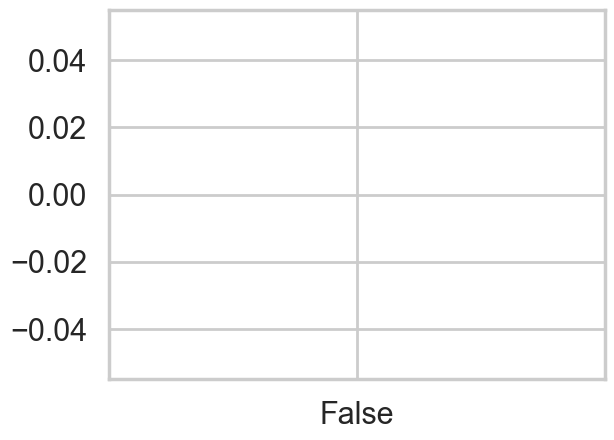

In [73]:
#THe distribution of the categories in the Churn column
sns.countplot(x='Churn', data=train)
plt.show()

ValueError: cannot reindex on an axis with duplicate labels

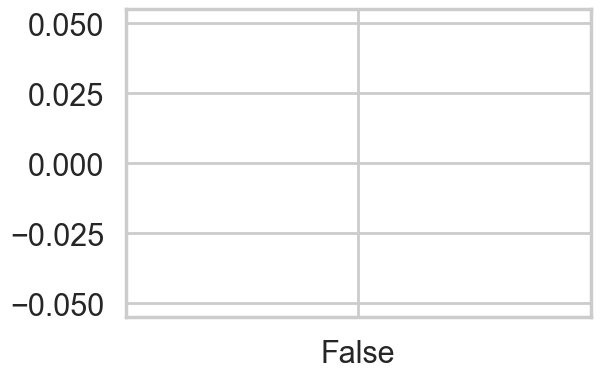

In [72]:
# Plot the countplot with annotations
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Churn', data=train, palette='viridis')

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=11, color='black')

plt.show()

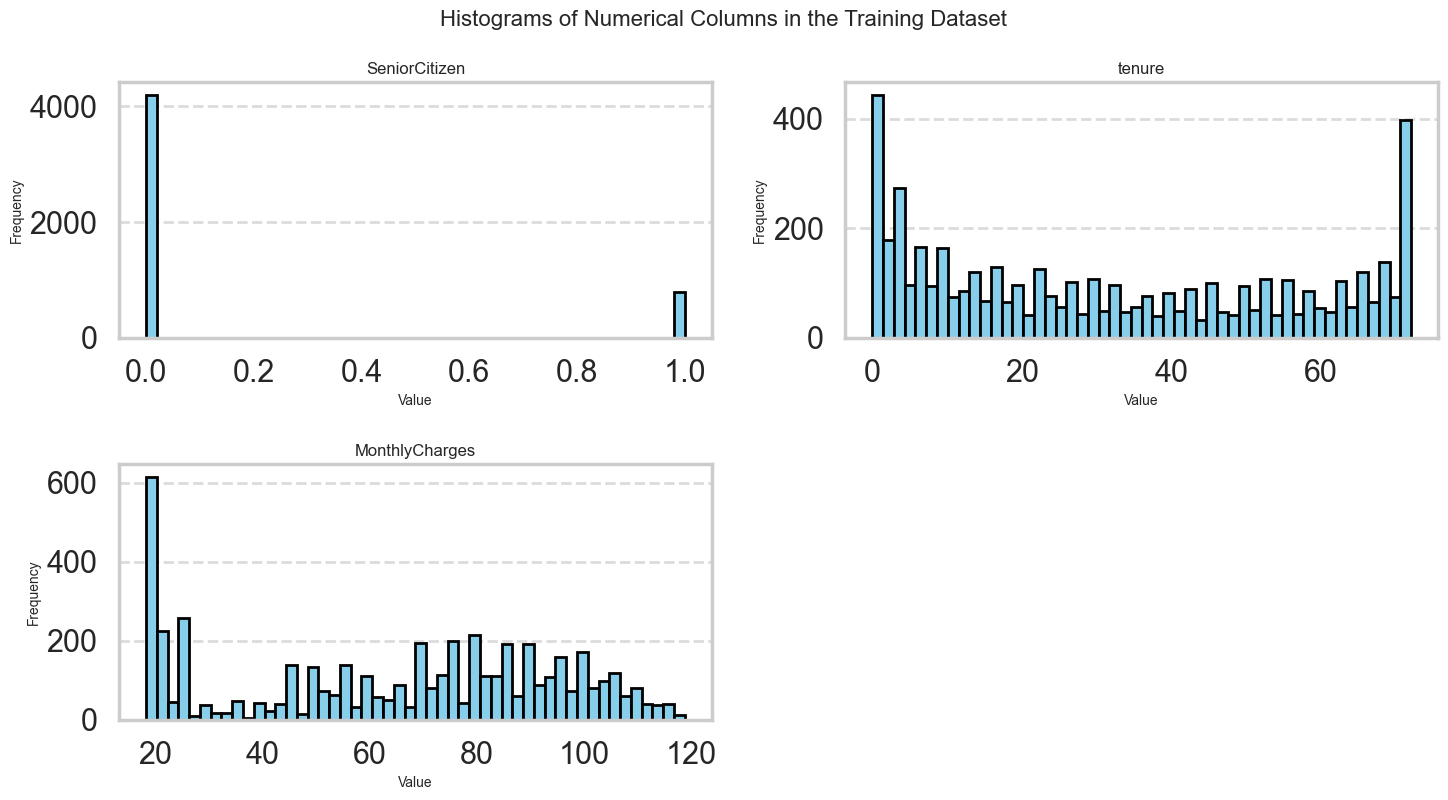

In [ ]:
# Get the number of numerical columns in the 'train' DataFrame
num_cols = train.select_dtypes(include=['number']).columns

# Set up the number of rows and columns for subplots
num_rows = len(num_cols) // 2 + len(num_cols) % 2
num_columns = 2

# Set up the figure size for better visualization
plt.figure(figsize=(15, num_rows * 4))

# Create subplots
for i, col in enumerate(num_cols):
    plt.subplot(num_rows, num_columns, i + 1)
    train[col].hist(bins=50, color='skyblue', edgecolor='black', grid=False)
    plt.title(col, fontsize=12)
    plt.xlabel('Value', fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Add a title for the overall set of subplots
plt.suptitle('Histograms of Numerical Columns in the Training Dataset', y=1.02, fontsize=16)

# Show the plot
plt.show()


In [ ]:
# Compute the correlation matrix
corr_matrix = train.corr()

# Plot a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

ValueError: could not convert string to float: '7590-VHVEG'

In [ ]:

# Replace boolean values with 0 and 1
data_1['SeniorCitizen'] = data_1['SeniorCitizen'].replace({False: 0, True: 1})
data_1['Partner'] = data_1['Partner'].replace({False: 0, True: 1})
data_1['Dependents'] = data_1['Dependents'].replace({False: 0, True: 1})
data_1['PhoneService'] = data_1['PhoneService'].replace({False: 0, True: 1})
data_1['MultipleLines'] = data_1['MultipleLines'].replace({False: 0, True: 1})
data_1['OnlineSecurity'] = data_1['OnlineSecurity'].replace({False: 0, True: 1})
data_1['PaperlessBilling'] = data_1['PaperlessBilling'].replace({False: 0, True: 1})
data_1['Churn'] = data_1['Churn'].replace({False: 0, True: 1})

# Display the DataFrame after replacement
print(data_1.head())


   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG  Female              0        1           0       1   
1  5575-GNVDE    Male              0        0           0      34   
2  3668-QPYBK    Male              0        0           0       2   
3  7795-CFOCW    Male              0        0           0      45   
4  9237-HQITU  Female              0        0           0       2   

   PhoneService  MultipleLines InternetService  OnlineSecurity  ...  \
0             0            NaN             DSL             0.0  ...   
1             1            0.0             DSL             1.0  ...   
2             1            0.0             DSL             1.0  ...   
3             0            NaN             DSL             1.0  ...   
4             1            0.0     Fiber optic             0.0  ...   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0            False       False       False           False  Month-to-month   
1 

In [ ]:
data_1.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines       float64
InternetService      object
OnlineSecurity      float64
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn               float64
dtype: object

In [ ]:
data_1.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [ ]:
data_2.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [ ]:
data_1['customerID'].unique()

array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '1891-FZYSA',
       '4770-UEZOX', '1A1:U3001038-RQOST'], dtype=object)

In [ ]:
data_1['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
data_1.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,2731.000000,2349.000000,3000.000000,3000.000000,2995.000000,2999.000000
mean,0.158333,0.487333,0.31000,32.527333,0.910333,0.473819,0.370796,0.592000,65.347400,2301.278315,0.260087
std,0.365114,0.499923,0.46257,24.637768,0.285751,0.499406,0.483121,0.491545,30.137053,2274.987884,0.438755
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,18.400000,18.799999,0.000000
25%,0.000000,0.000000,0.00000,9.000000,1.000000,0.000000,0.000000,0.000000,35.787499,415.250000,0.000000
50%,0.000000,0.000000,0.00000,29.000000,1.000000,0.000000,0.000000,1.000000,70.900002,1404.650024,0.000000
75%,0.000000,1.000000,1.00000,56.000000,1.000000,1.000000,1.000000,1.000000,90.262501,3868.725098,1.000000
max,1.000000,1.000000,1.00000,72.000000,1.000000,1.000000,1.000000,1.000000,118.650002,8564.750000,1.000000
